In [8]:
import os
import numpy as np
import csv
import datetime
import matplotlib.pyplot as plt
import sys
import argparse
import re
import datetime
from scipy.stats import skew as sps

In [43]:
path = 'C:/Users/emily/documents/CO2_calibration/Summer_8'

In [3]:
x = []
y = []
yerr = []
allCO2 = []
for filename in os.listdir(path):
    print(filename)
    with open(path+'/'+filename,'r') as f:
        reader = csv.reader(f)
        CO2 = []
        err = []
        for row in reader:
            try:
                CO2.append(float(row[1]))
                err.append(float(row[2]))
            except Exception as e:
                print(e)
                pass
        CO2_avg = np.mean(np.array(CO2))
        err_avg = np.std(np.array(CO2))
        allCO2.append(CO2)
        print(CO2_avg)
        print(err_avg)
        file_ID = re.match( r'(.*)_(.*)_(.*)_2019.*', filename, re.M)
        x.append(file_ID.group(3))
        y.append(CO2_avg)
        yerr.append(err_avg)

Inside_p4_g1_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
466.4440396660407
8.523546483542546
Inside_p4_g3_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
450.28319197401976
9.792686351040544
Inside_p4_g4_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
437.60777150238135
10.902324652693775
Inside_p4_g5_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
416.89945454092
5.2648112220042425
Inside_p4_g6_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
439.34864889435937
1.4933099970906387
Inside_p4_g7_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
444.16023566250544
6.103812673377843
Inside_p4_g8_2019-06-03_CO2.csv
could not convert string to float: 'CO2 (ppm)'
460.6375122466694
9.710376576255568


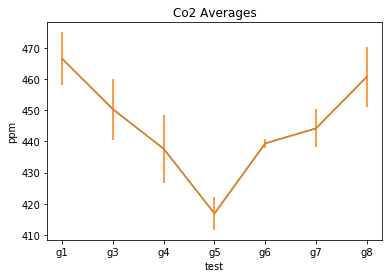

In [4]:
plt.plot(x,y)
plt.errorbar(x,y,yerr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Averages')

plt.show()

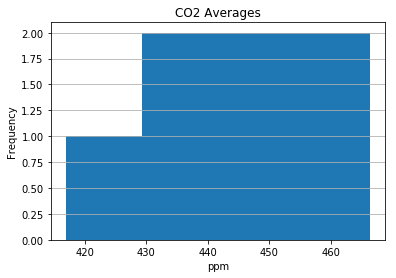

In [5]:
n, bins, patches = plt.hist(x=y, bins='auto')
plt.grid(axis='y')
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.title('CO2 Averages')
plt.show()

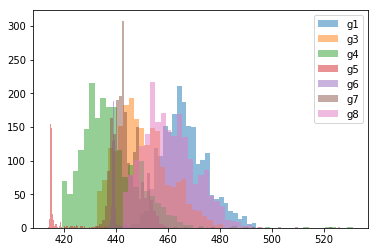

In [6]:
labels=x
for i in range(len(allCO2)):
    n, bins, patches = plt.hist(x=allCO2[i], bins='auto', alpha=0.5, label=labels[i])
plt.legend(loc='upper right')

In [7]:
Total_mean = np.mean(np.array(y))
Tmean = print('Total avg = {}'.format(Total_mean))
Total_std = np.std(np.array(y))
print('Total std = {}'.format(Total_std))
Ins_rms = np.square(np.array(yerr))
Total_rms = np.sqrt(np.sum(Ins_rms))
print('rms = {}'.format(Total_rms))

Total avg = 445.05440778384224
Total std = 15.16197637498768
rms = 21.187363871299187


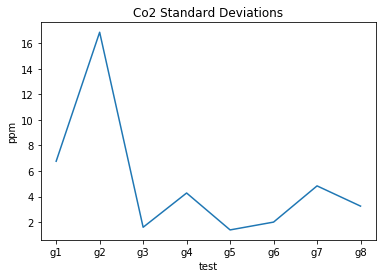

In [21]:
plt.plot(x,yerr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Standard Deviations')

plt.show()

In [44]:
a = []
b = []
berr = []
all2CO2 = []
skew = []

#start_time = input("time you want to start data collection: ")
#end_time = input("time you want to end data collection: ")

for filename in os.listdir(path):
    print(filename)
    with open(path+'/'+filename,'r') as f:
        reader = csv.reader(f)
        CO2 = []
        err = []
        
        for row in reader:
            try:
                start = float(row[0])+7200
                break
            except Exception as e:
                pass
        
        ends = start+14400
        
        for row in reader:
            if float(row[0]) >= start:
                if float(row[0]) <= ends:
                    try:
                        CO2.append(float(row[1]))
                        err.append(float(row[2]))
                    except Exception as e:
                        print(e)
                        pass  
                    
        CO2_avg = np.mean(np.array(CO2))
        err_avg = np.std(np.array(CO2))
        all2CO2.append(CO2)
        
        print(CO2_avg)
        print(err_avg)
        
        file_ID = re.match( r'(.*)_(.*)_(.*)_2019.*', filename, re.M)
        a.append(file_ID.group(3))
        b.append(CO2_avg)
        berr.append(err_avg)
    skewed = sps(np.array(b))
    skew.append(skewed)
print("Skew={}".format(skew))

Inside_p8_g1_2019-06-10_CO2.csv
500.79382177761477
7.568994993778336
Inside_p8_g3_2019-06-10_CO2.csv
494.04445800838624
7.32364510863797
Inside_p8_g4_2019-06-10_CO2.csv
512.289759697736
9.770724490088696
Inside_p8_g5_2019-06-10_CO2.csv
443.9982122163086
9.539315542021093
Inside_p8_g6_2019-06-10_CO2.csv
440.24474990025993
3.345469786456272
Inside_p8_g7_2019-06-09_CO2.csv
475.0362891788682
7.929250523156631
Inside_p8_g8_2019-06-10_CO2.csv
511.0324347980109
7.011308924140478
Skew=[0.0, -2.5328662104565146e-14, 0.30581831532045806, -0.9380569863299429, -0.29713291212293935, -0.2659809530931036, -0.49045714625756326]


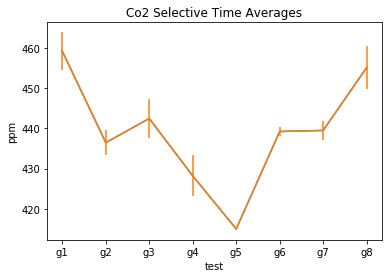

In [99]:
plt.plot(a,b)
plt.errorbar(a,b,berr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Selective Time Averages')

plt.show
plt.savefig('CO2 Averages Graph P4')

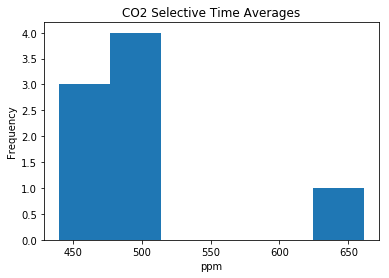

In [90]:
n, bins, patches = plt.hist(x=b, bins='auto')
plt.grid(axis='b')
plt.xlabel('ppm')
plt.ylabel('Frequency')
plt.title('CO2 Selective Time Averages')
plt.show()

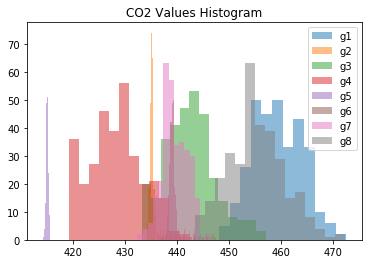

In [98]:
labels=a
for i in range(len(all2CO2)):
    n, bins, patches = plt.hist(x=all2CO2[i], bins='auto', alpha=0.5, label=labels[i])
plt.legend(loc='best')
plt.title('CO2 Values Histogram')
plt.savefig('CO2 Averages Histogram P4')

In [28]:
Total_mean = np.mean(np.array(b))
Tmean = print('Total avg = {}'.format(Total_mean))
Total_std = np.std(np.array(b))
print('Total std = {}'.format(Total_std))
Ins_rms = np.square(np.array(berr))
Total_rms = np.sqrt(np.sum(Ins_rms))
print('rms = {}'.format(Total_rms))
Skew = print('Skew = {}'.format(skew))

Total avg = 439.82296982451817
Total std = 13.985274953865055
rms = 10.346130771551183
Skew = [0.0, 0.0, 0.09765488956478857, 0.13078331335105156, 0.023984145705711682, -0.0719244549010809, -0.3116216388714753]


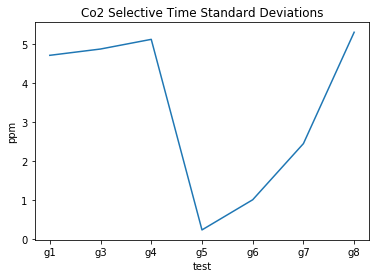

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(a,berr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Selective Time Standard Deviations')

plt.show()
plt.savefig('CO2_Standard_Deviations_P8.png')

Total avg = 482.4913893681693
Mean diff = [18.302432409445487, 11.553068640216964, 29.79837032956675, 38.493177151860664, 42.24663946790935, 7.455100189301106, 28.54104542984163]


Text(0, 0.5, 'ppm')

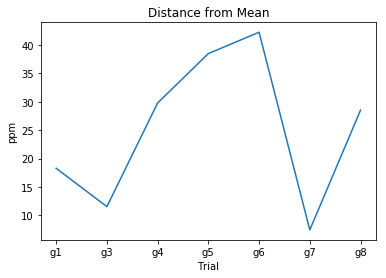

In [61]:
Total_mean = np.mean(np.array(b))
Tmean = print('Total avg = {}'.format(Total_mean))

Mean_difference = []

for i in b:
    mean = np.abs(Total_mean-i)
    Mean_difference.append(mean)
Mdiff = print('Mean diff = {}'.format(Mean_difference))    

plt.plot(a, Mean_difference)
plt.title("Distance from Mean")
plt.xlabel("Trial")
plt.ylabel("ppm")